## ABOUT DATASET

- A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History. 

| # | Thuộc tính | Mô tả
| --- | --- | --- 
| 1 | Age | Age Of The Customer
| 2 | Employment Type | The Sector In Which Customer Is Employed
| 3 | GraduateOrNot | Whether The Customer Is College Graduate Or Not
| 4 | AnnualIncome | The Yearly Income Of The Customer In Indian Rupees
| 5 | FamilyMembers | Number Of Members In Customer's Family
| 6 | ChronicDisease | Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc
| 7 | FrequentFlyer | Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019)
| 8 | EverTravelledAbroad | Has The Customer Ever Travelled To A Foreign Country
| 9 | TravelInsurance |  Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019

## Import Library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
## Library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## Load Dataset

In [80]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


##  Data Dictionary & Data Quality Assessment

In [81]:
# drop columns 'Unnamed: 0'
df = df.drop(["Unnamed: 0"], axis = 1)
df 

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


### About data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


### Convert data types

In [89]:
df['ChronicDiseases'] = df['ChronicDiseases'].replace({1: 'Yes', 0:'No'})

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 139.8+ KB


In [91]:
df.describe()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.357323
std,2.913308,3.768557e+05,1.609650,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


In [92]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

## EDA

In [107]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

### Employment Type follow TravelInsurance

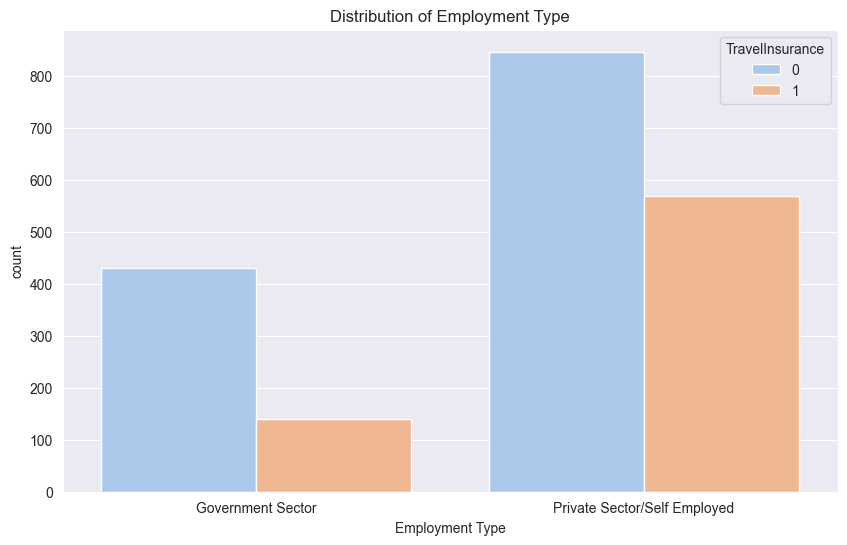

In [193]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Employment Type', hue='TravelInsurance', palette='pastel')
plt.title(f'Distribution of Employment Type')

plt.show()

- Customers who are Private Sector/Self Employed tend to purchase insurance more frequently."

### Distribution of ChronicDiseases by Age

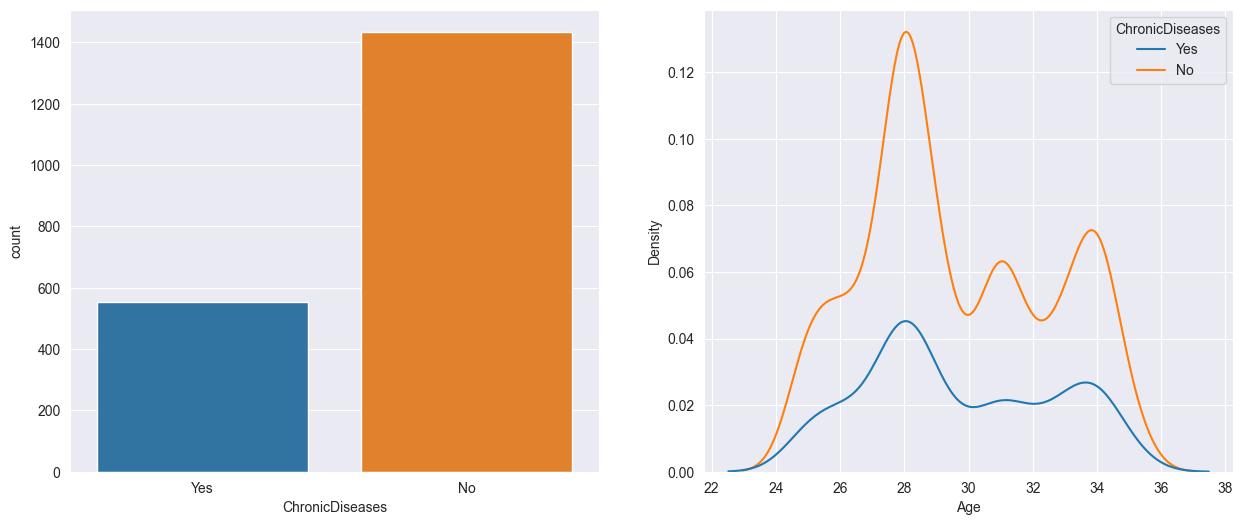

In [186]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df, x='ChronicDiseases')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x='Age', hue='ChronicDiseases')
plt.show()

- In the dataset, the number of people with chronic diseases is quite low => There is no strong correlation with TravelInsurance.

### Distribution FamilyMembers, AnnualIncome,Age

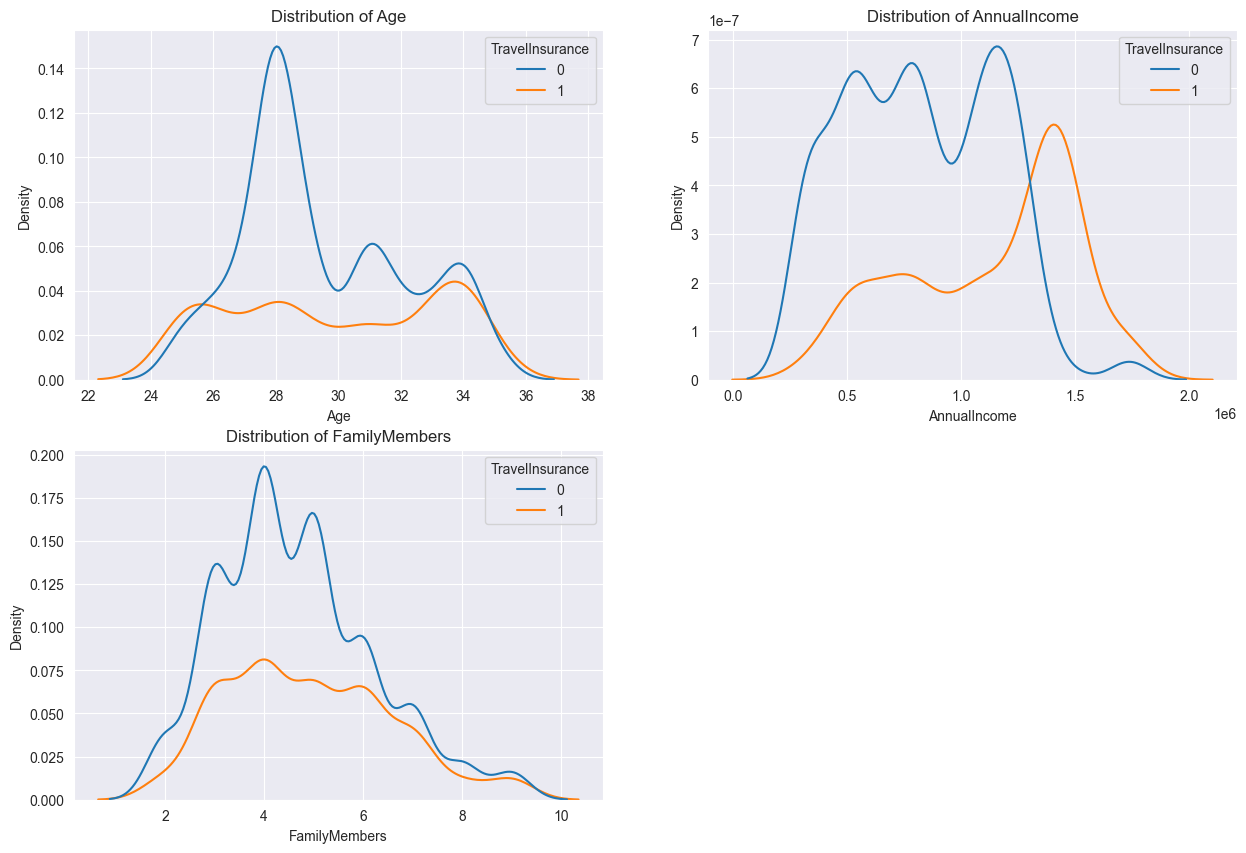

In [161]:
variables = ['Age', 'AnnualIncome', 'FamilyMembers']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df, x=feature, hue='TravelInsurance')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.show()


- In the Age chart, we can see that the age range of 25 to 34 years is the most likely to purchase insurance.
- In the AnnualIncome chart, it shows that individuals with higher income tend to buy insurance more often.
- In the FamilyMembers chart, it indicates that those with 3 to 6 family members are more inclined to purchase insurance.


=> Regarding insurance factors, individuals with higher income tend to buy insurance."

## Preprocessing

###  Check duplicate values

In [195]:
dup = df[df.duplicated()]
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 69 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  738 non-null    int64 
 1   Employment Type      738 non-null    object
 2   GraduateOrNot        738 non-null    object
 3   AnnualIncome         738 non-null    int64 
 4   FamilyMembers        738 non-null    int64 
 5   ChronicDiseases      738 non-null    object
 6   FrequentFlyer        738 non-null    object
 7   EverTravelledAbroad  738 non-null    object
 8   TravelInsurance      738 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 57.7+ KB


### Missing Values

In [196]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### Check balanced


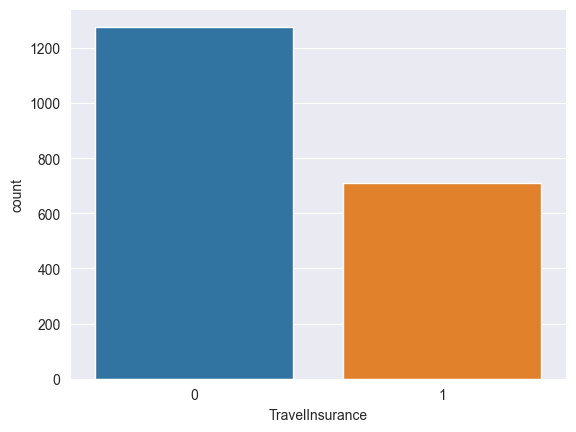

TravelInsurance
0    1277
1     710
dtype: int64


In [194]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='TravelInsurance')
plt.show()

size = df.groupby("TravelInsurance").size()
print(size)

- More customers do not buy travel insurance
- Reasonably balanced dataset (Estimated 60% do not purchase, 40% purchase)

### Outlier

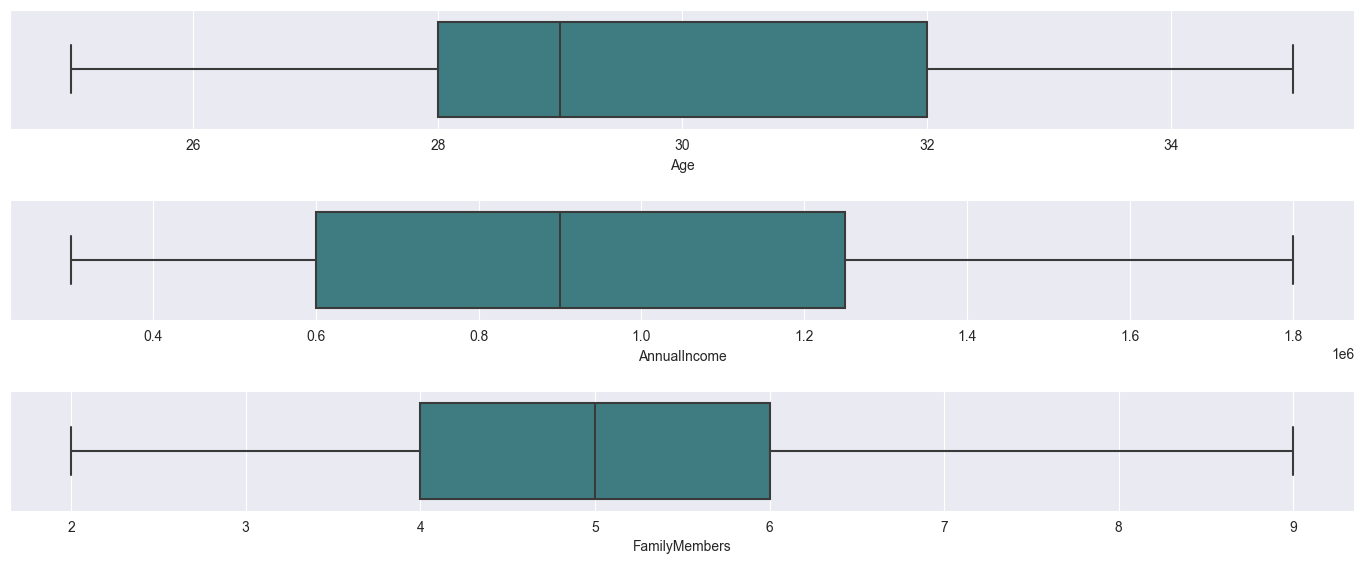

In [197]:
variables = ['Age','AnnualIncome','FamilyMembers']
fig, axes=plt.subplots(len(variables), 1, figsize=(14, 2*len(variables)),sharex=False,sharey=False)

for i, column in enumerate(variables):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

- Based on the box plot chart, it is evident that there are no outliers in the numeric variables


## Feature Engineering

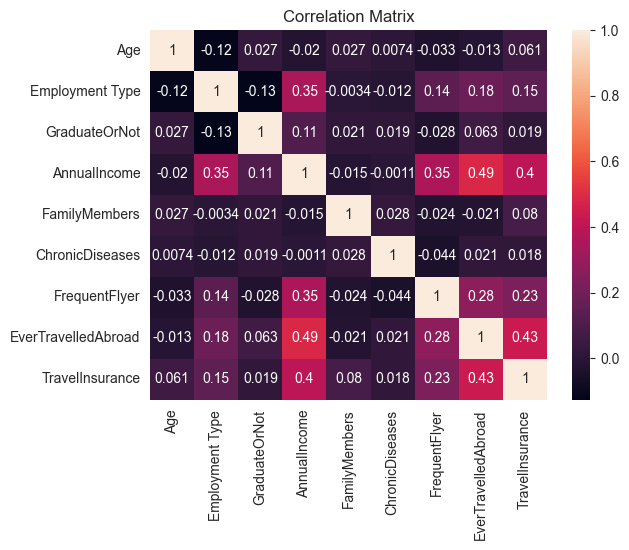

In [199]:
def apply_feature_engineering(df):
    for feature in df.columns:
        if df[feature].dtype == "object":
            df[feature] = df[feature].astype('category').cat.codes
        
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

## Model

### Train-test split

In [205]:
X = df.drop(['TravelInsurance'], axis=1)
y = y = df['TravelInsurance']

In [210]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((1589, 8), (398, 8))

### XGBoost

In [232]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBClassifier())
])

param_distributions = {
    'xgboost__n_estimators': [100, 200, 300, 400, 500],
    'xgboost__learning_rate': np.linspace(0.01, 0.3, 10),
    'xgboost__max_depth': [3, 4, 5, 6, 7],
    'xgboost__subsample': np.linspace(0.6, 1.0, 5),
    'xgboost__colsample_bytree': np.linspace(0.6, 1.0, 5),
    'xgboost__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    random_state=42 
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Test set accuracy: {test_accuracy:.4f}")

Best parameters found: {'xgboost__subsample': 1.0, 'xgboost__n_estimators': 200, 'xgboost__max_depth': 4, 'xgboost__learning_rate': 0.01, 'xgboost__gamma': 0.3, 'xgboost__colsample_bytree': 0.7}
Test set accuracy: 0.8417


In [231]:
y_pred = random_search.predict(X_train)
print('Train predict')
print(classification_report(y_train, y_pred))

Train predict
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1020
           1       0.93      0.61      0.73       569

    accuracy                           0.84      1589
   macro avg       0.87      0.79      0.81      1589
weighted avg       0.86      0.84      0.83      1589



In [233]:
y_pred = random_search.predict(X_test)
print('Test predict')
print(classification_report(y_test, y_pred))

Test predict
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.56      0.71       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.80       398
weighted avg       0.87      0.84      0.83       398



- The model achieved an accuracy of 0.8417 with the following parameters: 'xgboost__subsample': 1.0, 'xgboost__n_estimators': 200, 'xgboost__max_depth': 4, 'xgboost__learning_rate': 0.01, 'xgboost__gamma': 0.3, 'xgboost__colsample_bytree': 0.7.